<a href="https://colab.research.google.com/github/tushar2k/Sem-V-labs/blob/master/DL-%20ECSE440L/DL_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras import layers
from keras.datasets import mnist
from matplotlib import pyplot
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.layers import *
from keras.optimizers import SGD
import PIL
import PIL.Image
import tensorflow as tf
from os import listdir
import cv2
from sklearn.model_selection import train_test_split

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip
!unzip -q DevanagariHandwrittenCharacterDataset

--2020-09-25 10:55:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80417803 (77M) [application/x-httpd-php]
Saving to: ‘DevanagariHandwrittenCharacterDataset.zip’

DevanagariHandwritt 100%[===================>]  76.69M  35.9MB/s    in 2.1s    

2020-09-25 10:55:28 (35.9 MB/s) - ‘DevanagariHandwrittenCharacterDataset.zip’ saved [80417803/80417803]



In [3]:
# cd /content/DevanagariHandwrittenCharacterDataset/Train/

In [4]:
imroot=listdir('/content/DevanagariHandwrittenCharacterDataset/Train')

In [5]:
imroot=list(i for i in imroot if ('digit' in i))
imroot

['digit_1',
 'digit_9',
 'digit_2',
 'digit_7',
 'digit_8',
 'digit_5',
 'digit_0',
 'digit_6',
 'digit_4',
 'digit_3']

In [6]:
imroot.sort()
imroot

['digit_0',
 'digit_1',
 'digit_2',
 'digit_3',
 'digit_4',
 'digit_5',
 'digit_6',
 'digit_7',
 'digit_8',
 'digit_9']

In [7]:
X=[]
for i in imroot:
    if i:
        imfol=listdir('/content/DevanagariHandwrittenCharacterDataset/Train/'+i)
        print(len(imfol))
        for j in imfol:
            a= cv2.imread('/content/DevanagariHandwrittenCharacterDataset/Train/'+i+'/'+j,0)
            a=np.array(a)
            X.append(a)

1700
1700
1700
1700
1700
1700
1700
1700
1700
1700


In [8]:
# a=cv2.imread('/content/DevanagariHandwrittenCharacterDataset/Train/digit_3/67150.png',0)
X=np.array(X)
X.shape

(17000, 32, 32)

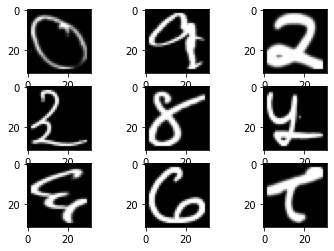

In [9]:
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X[i*1700], pyplot.get_cmap('gray'))
pyplot.show()

In [10]:
Y=np.array(list([x]*1700 for x in range(10)))

In [11]:
Y=Y.reshape(17000,)
Y

array([0, 0, 0, ..., 9, 9, 9])

In [12]:
X = X.reshape((X.shape[0],1024))
Y = to_categorical(Y)
print(X.shape, Y.shape)

(17000, 1024) (17000, 10)


In [13]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [14]:
trainX,testX,trainy,testy=train_test_split(X,Y,test_size=0.25,random_state=32)
print(trainX.shape, trainy.shape)
print(testX.shape, testy.shape)

(12750, 1024) (12750, 10)
(4250, 1024) (4250, 10)


In [15]:
trainX=trainX/255.0
testX=testX/255.0
X_train=trainX
X_test=testX
y_train=trainy
y_test=testy

In [16]:
# X_train=X_train.reshape(12750,32,32,1)
# X_test=X_test.reshape(4250,32,32,1)

In [17]:
x=3
acc=[]
his=[]
input_dim = X_train.shape
while x<11:
    model = Sequential()
    model.add(Dense(pow(2,x),input_shape=input_dim,activation='relu'))
    model.add(layers.Dense(10, input_shape=input_dim, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    his.append(model.fit(X_train,y_train,epochs=20))
    acc.append(model.evaluate(X_test,y_test)[1])
    x+=1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12750, 8)          8200      
_________________________________________________________________
dense_1 (Dense)              (None, 12750, 10)         90        
Total params: 8,290
Trainable params: 8,290
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
399/399 [==============================] - 0s 1ms/step - loss: 0.7558 - accuracy: 0.7632
Epoch 2/20
399/399 [==============================] - 1s 1ms/step - loss: 0.3263 - accuracy: 0.9049
Epoch 3/20
399/399 [==============================] - 1s 1ms/step - loss: 0.2475 - accuracy: 0.9271
Epoch 4/20
399/399 [==============================] - 1s 1ms/step - loss: 0.2065 - accuracy: 0.9422
Epoch 5/20
399/399 [==============================] - 1s 2ms/step - loss: 0.1866 - accuracy: 0.9453
Epoch 6/20
399/3

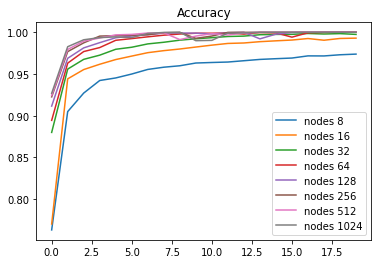

In [18]:
x=range(len(his[0].history['accuracy']))
x=np.array(x)
plt.title('Accuracy')
for i in range(len(his)):
    plt.plot(x,np.array(his[i].history['accuracy']).T,label = 'nodes %s'%pow(2,i+3))
plt.legend()
plt.show()

In [19]:
model1=Sequential()
input_dim = X_train.shape[1]
his1=[]
model1.add(layers.Dense(32, input_dim=input_dim, activation='relu'))
x=2
while x<6:
    model1.add(layers.Dense(32, input_dim=input_dim, activation='relu'))
    model1.add(Dense(10,activation='softmax'))
    model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    his1.append(model1.fit(X_train,y_train,epochs=20))
    if x!=5:
        model1.pop()
    x+=1

Epoch 1/20
399/399 [==============================] - 1s 1ms/step - loss: 0.0769 - accuracy: 0.8606
Epoch 2/20
399/399 [==============================] - 1s 1ms/step - loss: 0.0264 - accuracy: 0.9569
Epoch 3/20
399/399 [==============================] - 1s 2ms/step - loss: 0.0197 - accuracy: 0.9678
Epoch 4/20
399/399 [==============================] - 1s 1ms/step - loss: 0.0153 - accuracy: 0.9755
Epoch 5/20
399/399 [==============================] - 1s 1ms/step - loss: 0.0119 - accuracy: 0.9818
Epoch 6/20
399/399 [==============================] - 1s 1ms/step - loss: 0.0100 - accuracy: 0.9852
Epoch 7/20
399/399 [==============================] - 1s 1ms/step - loss: 0.0085 - accuracy: 0.9869
Epoch 8/20
399/399 [==============================] - 1s 1ms/step - loss: 0.0068 - accuracy: 0.9905
Epoch 9/20
399/399 [==============================] - 1s 2ms/step - loss: 0.0061 - accuracy: 0.9914
Epoch 10/20
399/399 [==============================] - 1s 2ms/step - loss: 0.0055 - accuracy: 0.9926

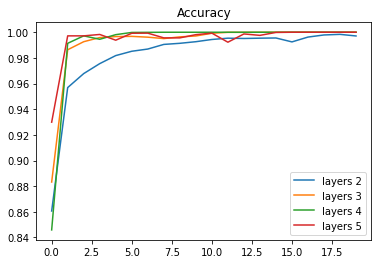

In [20]:
x=range(len(his1[3].history['accuracy']))
x=np.array(x)
plt.title('Accuracy')
for i in range(len(his1)):
    plt.plot(x,np.array(his1[i].history['accuracy']).T,label = 'layers %s'%(i+2))
plt.legend()
plt.show()

[1344 2966 1318 3136  114  233 3236 4066 3212  271 2234 2067 3970  326
 1239 2118 3017 3266 1209 1482]
[9, 9, 2, 1, 3, 3, 3, 6, 6, 5, 5, 0, 9, 8, 3, 3, 9, 6, 0, 4]
[9, 9, 2, 1, 3, 3, 3, 6, 6, 4, 5, 0, 9, 8, 3, 3, 9, 6, 0, 4]


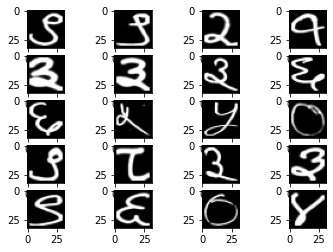

In [21]:
i=np.random.randint(0,4250,20)
print(i)
m,m1=[],[]
for j in i:
    m.append(np.argmax(model.predict(X_test[j].reshape(1,1024))))
    m1.append(np.argmax(model1.predict(X_test[j].reshape(1,1024))))
print(m)
print(m1)
for j in range(20):
    pyplot.subplot(5,4, 1 + j)
    pyplot.imshow(X_test[i[j]].reshape(32,32), pyplot.get_cmap('gray'))
pyplot.show()